#  KNN ve Naive Bayes Modeli Email-Spam 


In [1]:
import pandas as pd


# Veri Önişleme

In [3]:
#Stop Word
# Stem İşlemi

In [4]:
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df= df[['label_num','text']]
df.head()

,label_num,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [10]:
!pip install nltk

In [11]:
# Running,
# running
# runNing
# RUNNING!
# run

# RegularExpression
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# stem işlemi -> kelimelerin köküne indirme. -> Running -> Run
# stopword -> the, is, at
stemmer = PorterStemmer()
def clean_text(text):
    text = text.lower() # tüm harfleri küçük hale getirdim
    
    #text = re.sub(r'\d+', '', text) # metindeki tüm numerik değerleri kaldırdım
    
    text = text.translate(str.maketrans('','', string.punctuation)) # metindeki bütün noktalama işaretlerini kaldırır.
    
    words = text.split() # Merhaba Dünya => [Merhaba,Dünya]
    
    words = [ word for word in words if not word.isdigit() ] # Kelimelerin yalnızca numerik olanlarını ele.

    words = [ word for word in words if word not in stopwords.words('english')  ]

    words = [stemmer.stem(word) for word in words] # # Kelimeleri köklerine indir
   
    return ' '.join(words)

In [13]:
# Subject: hpl nom for january 9 , 2001\r\n( see
# subject hpl nom for january see
clean_text("Subject: hpl nom for january 9 , 2001 ( see ) p2p 4.5g 3d")

'subject hpl nom januari see p2p 45g 3d'

In [14]:
# Ben yazılım mühendisiyim
# Yazılım ben mühendisiyim

In [15]:

df.head()

,label_num,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [16]:
df['clean_text']= df['text'].apply(clean_text)
df.head()

,label_num,text,clean_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter follow note gave ...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom januari see attach file hplnol...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,subject indian spring deal book teco pvr reven...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X=["clean_text"]
y=df["label_num"]

tfidf = TfidfVectorizer()
X_tfidf= tfidf.fit_transform(df["clean_text"]) # makine ogrenmesi için daha dogru bir veri
#tf-idf-> metinleri sayısal vektörlere donüştürür.

X_train,X_test,y_train,y_test =train_test_split(X_tfidf,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import classification_report
y_pred= model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035



# Ödev : Aynı makine ögrenmesini "KNN" algoritması ile geliştirelim .Bu e posta spam mı degil mi bunu  yapan makine ogrenmesi yapalım.


In [25]:
df.loc[3,"clean_text"]

'subject photoshop window offic cheap main trend abas darer prudent fortuit undergon lightheart charm orinoco taster railroad affluent pornograph cuvier irvin parkhous blameworthi chlorophyl robe diagrammat fogarti clear bayda inconvenienc manag repres smart hashish academi sharehold unload bad danielson pure caffein spaniard chargeabl levin'

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text_v2(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english') and not w.isdigit()]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)


In [27]:
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),       # unigram + bigram
    max_df=0.9,               # çok sık geçen kelimeleri çıkar
    min_df=2,                 # çok nadir kelimeleri çıkar
)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Burada performans değerlendirmesi yapabilirsiniz


In [29]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')


In [30]:
from sklearn.neighbors import KNeighborsClassifier
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"])  # burada tüm metinler işleniyor
y = df["label_num"]


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.96      0.99      0.97       742
        Spam       0.97      0.89      0.93       293

    accuracy                           0.96      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



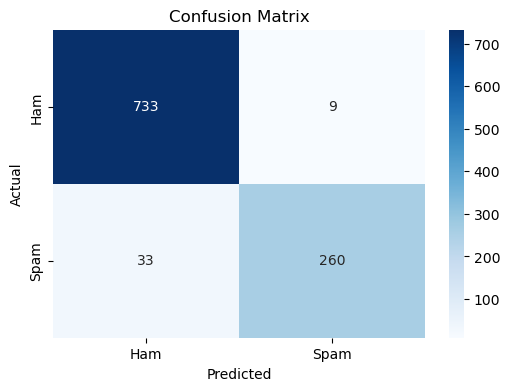

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



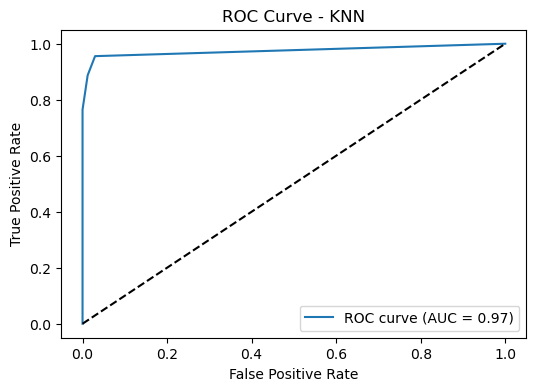

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# TF-IDF + Train-Test yeniden
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"])
y = df["label_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# ROC için predict_proba
y_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve grafiği
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()


In [35]:
from sklearn.metrics import classification_report, accuracy_score

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.9825918762088974
Test Accuracy : 0.9594202898550724


In [37]:
import pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [39]:
with open('email_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
